In [7]:
import numpy as np 
from numpy import percentile, argmax
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, classification_report, roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings('ignore')
%matplotlib inline

In [22]:
df = pd.read_excel("E Commerce Dataset.xlsx")

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [24]:
df.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,126.83
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,122.93


In [25]:
# Initialize lists to store categorical and numerical features
catfeat = []
numfeat = []

# Loop over the columns in the DataFrame
for i in df.columns:
  # Check the data type of the column
  if(df[i].dtypes == 'object'):
    # Append column name to list of categorical features
    catfeat.append(i)
  else:
    # Append column name to list of numerical features
    numfeat.append(i)

# Print the number of categorical and numerical features
print(f'The Number of Object Features : {len(catfeat)}')
print(f'The Number of Numerical Features : {len(numfeat)}')

The Number of Object Features : 5
The Number of Numerical Features : 15


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


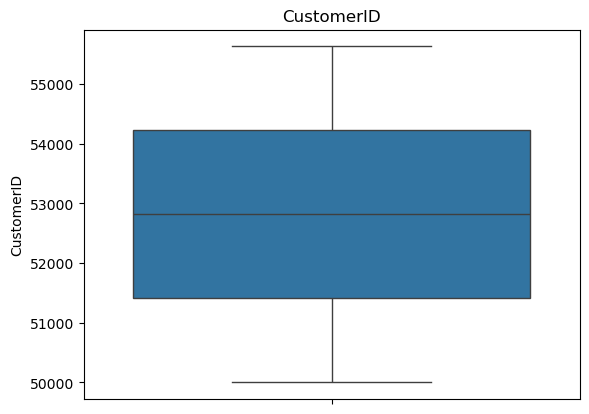

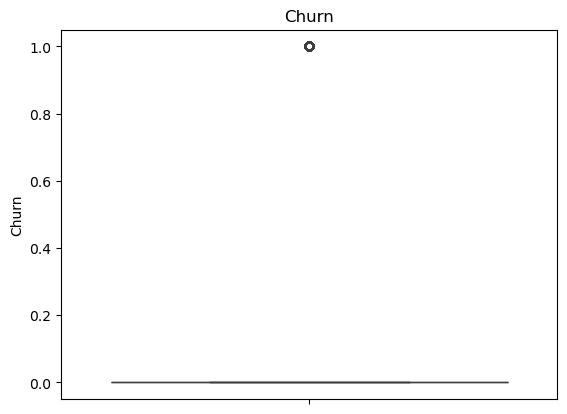

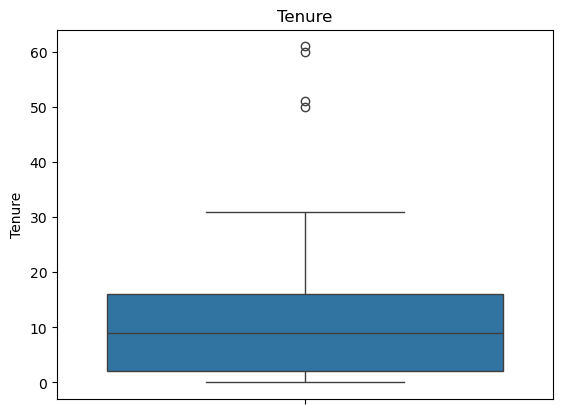

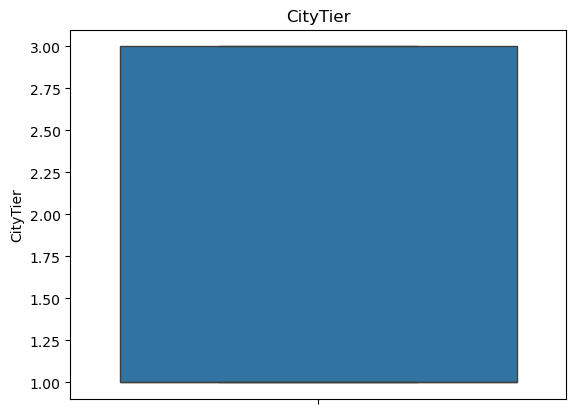

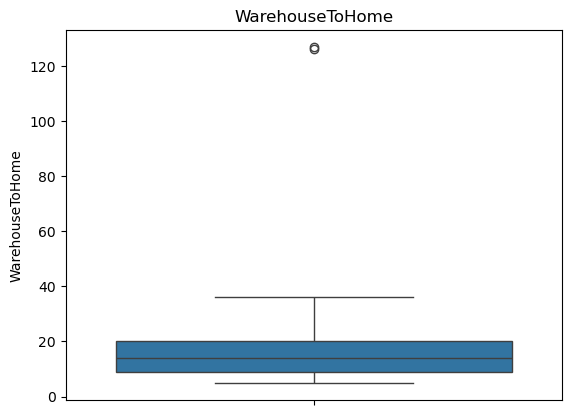

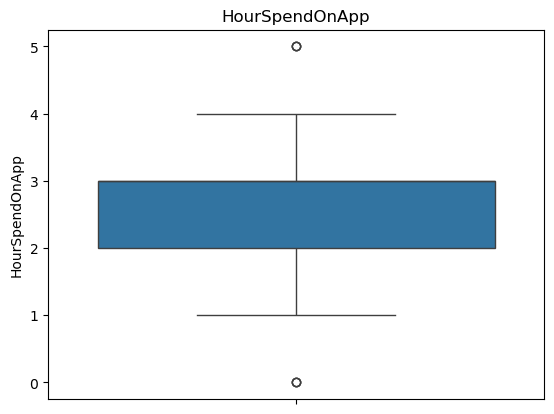

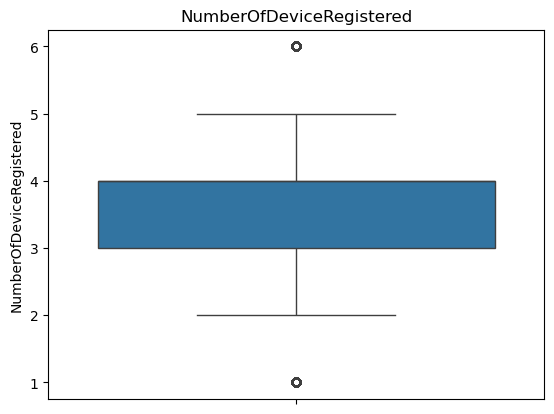

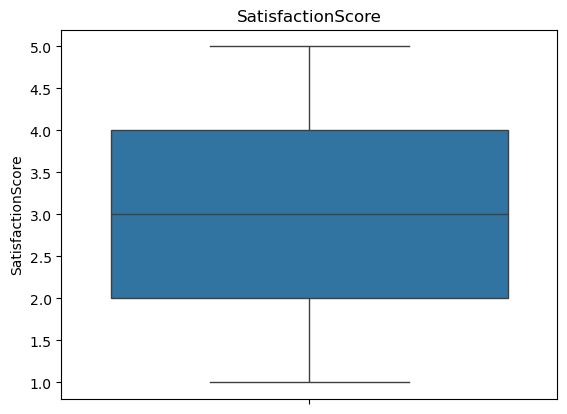

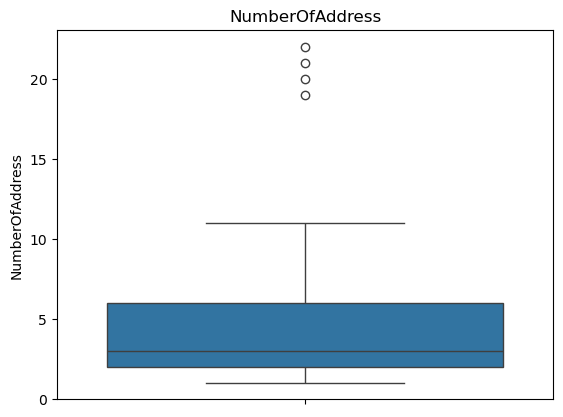

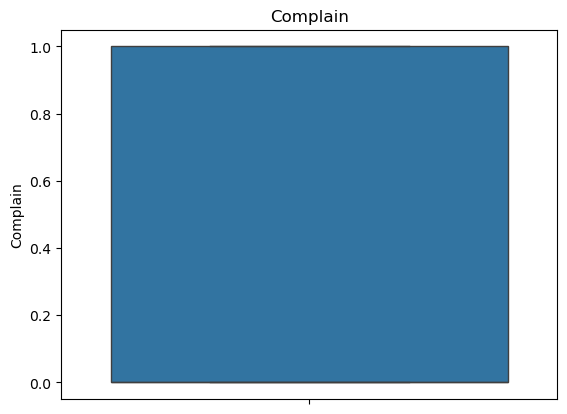

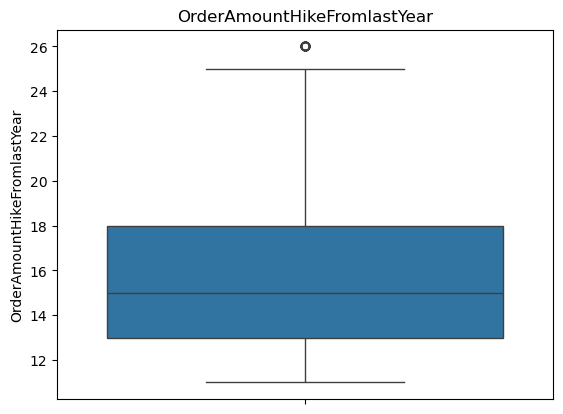

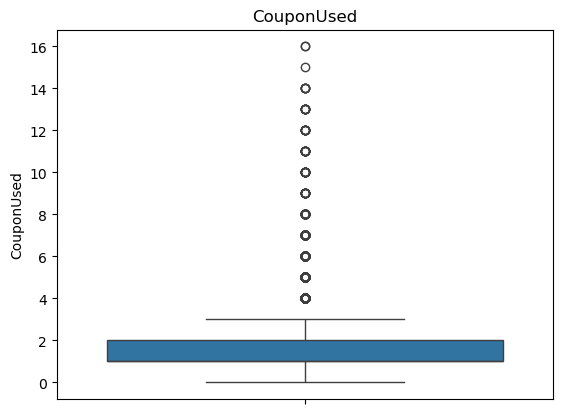

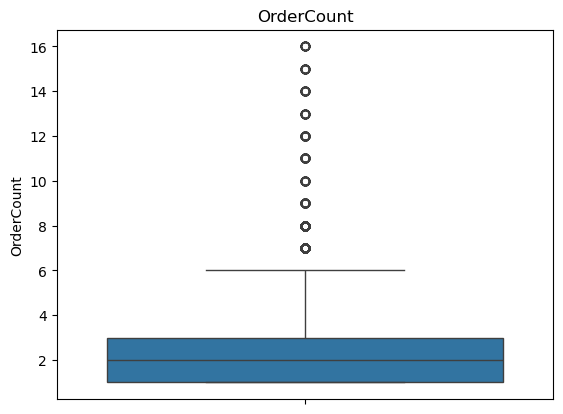

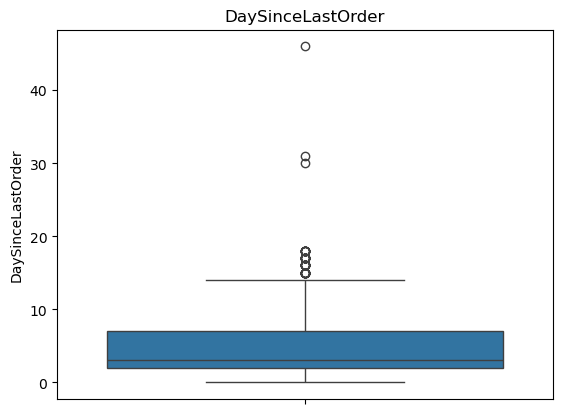

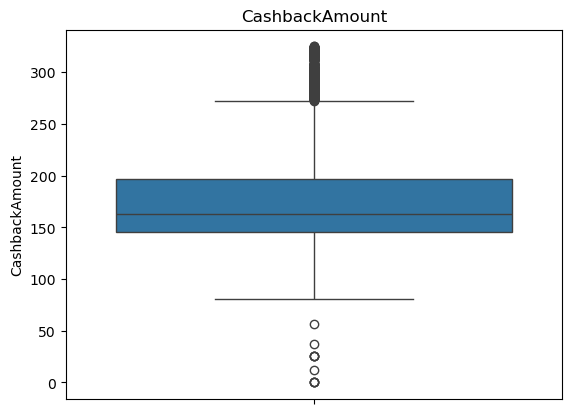

In [31]:
# Loop over the columns in the DataFrame
for i in df.columns:
  # Check if the data type of the column is int64 or float64
  if((df[i].dtype == 'int64') | (df[i].dtype == 'float64')):
    # Set the title of the plot to the name of the column
    plt.title(i)
    # Create a box plot of the column
    sns.boxplot(df[i])
    # Show the plot
    plt.show()

In [32]:
# Check missing values in dataset
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
# Loop over the columns in the DataFrame
for i in df.columns:
  # Check if there are any missing values in the column
  if (df[i].isnull().sum() > 0):
    # Calculate the percentage of missing values
    misval = (df[i].isnull().sum()) / (len(df[i])) * 100
    # Print the name of the column and the percentage of missing values
    print(f'{i} Perc. Mis Val = {misval:.2f} %')
import pandas as pd

df = pd.read_excel("E Commerce Dataset.xlsx")

Tenure Perc. Mis Val = 4.69 %
WarehouseToHome Perc. Mis Val = 4.46 %
HourSpendOnApp Perc. Mis Val = 4.53 %
OrderAmountHikeFromlastYear Perc. Mis Val = 4.71 %
CouponUsed Perc. Mis Val = 4.55 %
OrderCount Perc. Mis Val = 4.58 %
DaySinceLastOrder Perc. Mis Val = 5.45 %


In [8]:
# Check duplicated values in dataset 
df.duplicated().sum()

np.int64(0)

In [ ]:
# Initialize lists to store categorical and numerical features
catfeat = []
numfeat = []

# Loop over the columns in the DataFrame
for i in df.columns:
  # Check if the column is of type 'object'
  if (df[i].dtype == 'object'):
    # Print the name of the column and the number of unique labels
    print(f'{i} : {df[i].nunique()} labels')
import matplotlib.pyplot as plt

# Example values
churn = 200
nochurn = 800
labels = ['Churn', 'No Churn']

# plotting data on chart
fig = plt.figure(figsize=(10, 8))
plt.title('Customer Churn Rate at Company X', size=14)
plt.pie([churn, nochurn], labels=labels, autopct='%.0f%%')

plt.show()

PreferredLoginDevice : 3 labels
PreferredPaymentMode : 7 labels
Gender : 2 labels
PreferedOrderCat : 6 labels
MaritalStatus : 3 labels


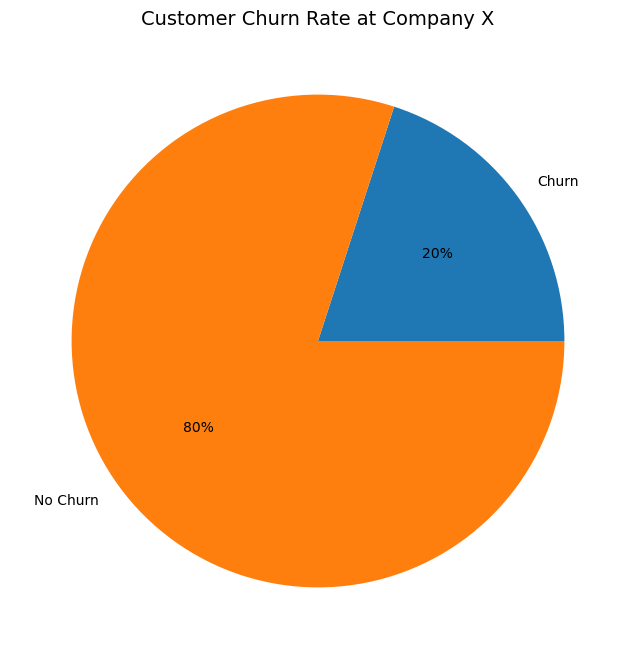

In [12]:
import matplotlib.pyplot as plt

# Example values
churn = 200
nochurn = 800
labels = ['Churn', 'No Churn']

# plotting data on chart
fig = plt.figure(figsize=(10, 8))
plt.title('Customer Churn Rate at Company X', size=14)
plt.pie([churn, nochurn], labels=labels, autopct='%.0f%%')

plt.show()

In [13]:
# Feature Lists of Customer Demography
custdemo = [ 'CityTier', 'Gender', 'MaritalStatus', 'NumberOfAddress', 'NumberOfDeviceRegistered','WarehouseToHome']
# Feature Lists of Customer Purchasing Behaviour
custbehv = [ 'Tenure', 'PreferredLoginDevice', 'PreferredPaymentMode', 'HourSpendOnApp', 'PreferedOrderCat', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 
            'DaySinceLastOrder', 'CashbackAmount']
# Feature List of Customer Compliance
custcompl = ['SatisfactionScore', 'Complain']

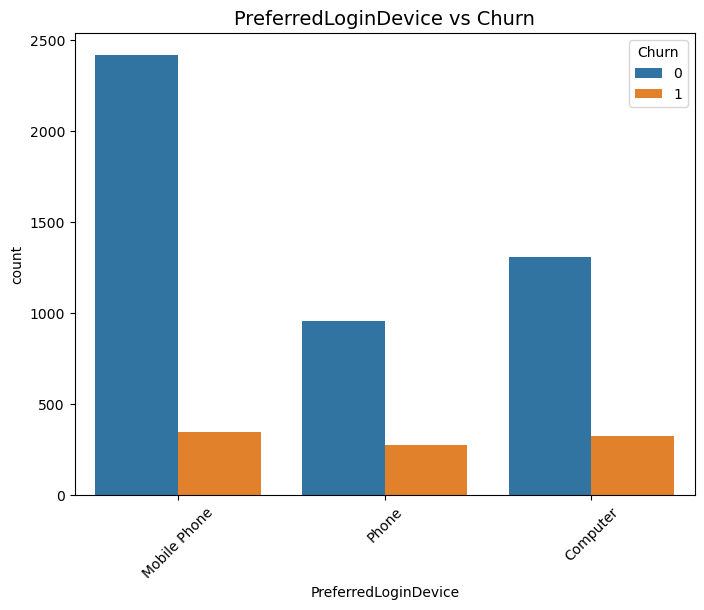

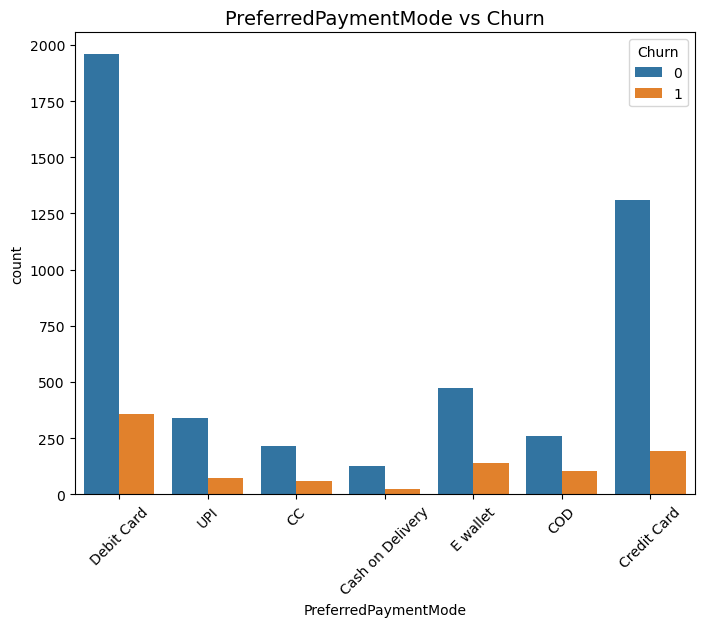

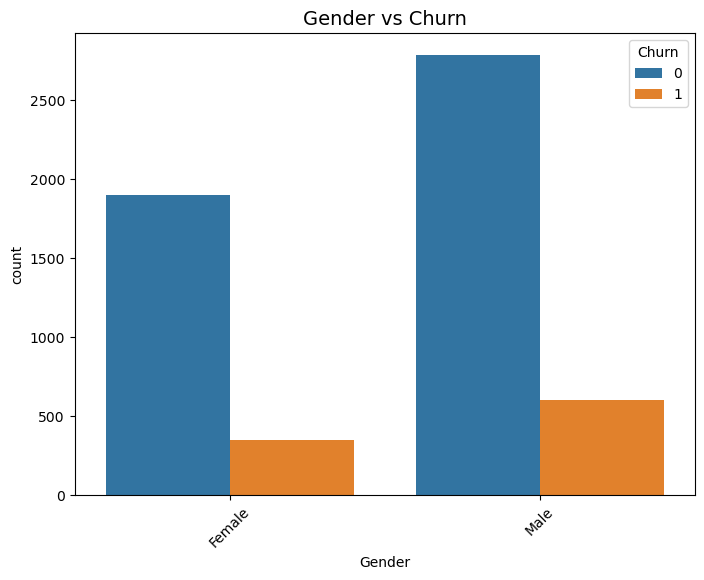

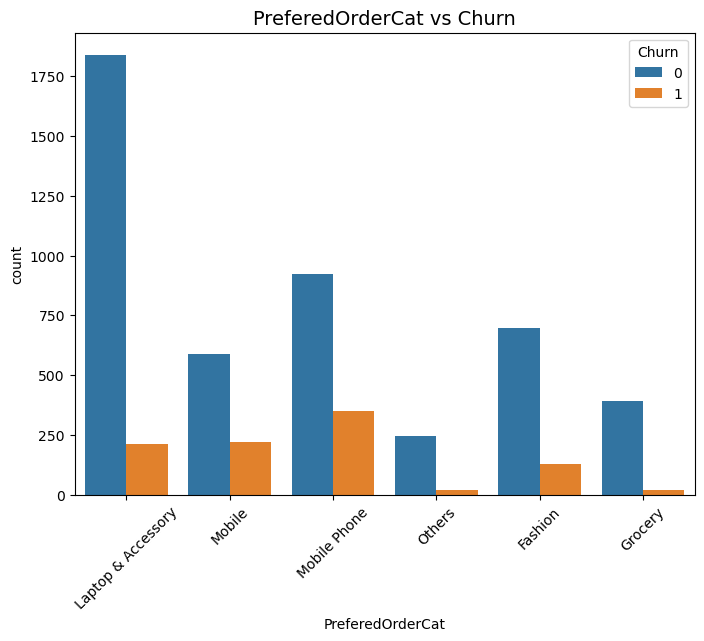

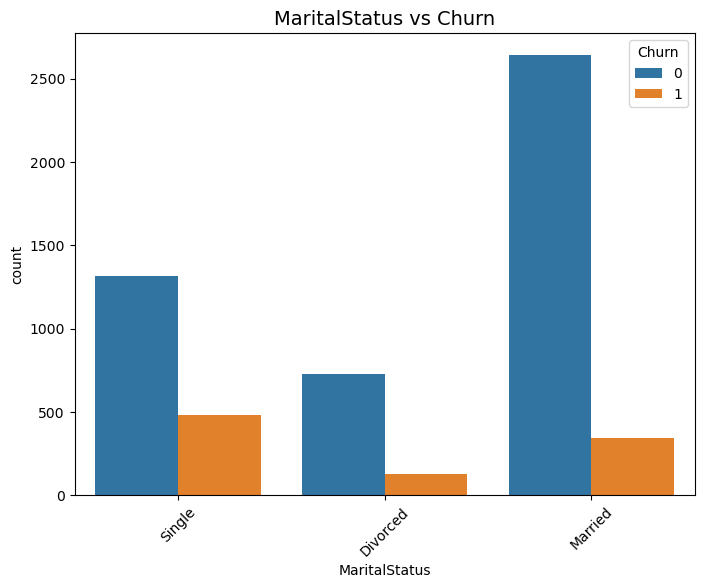

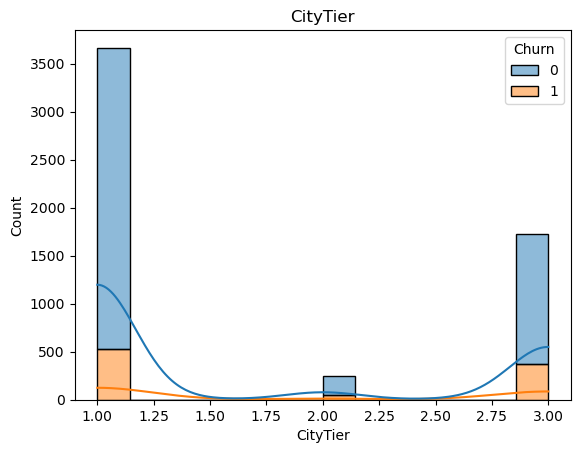

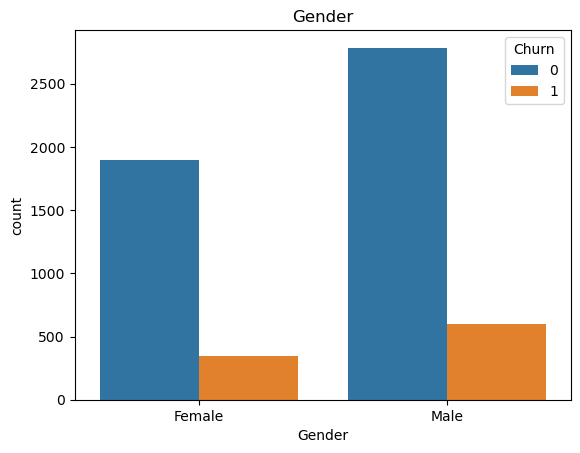

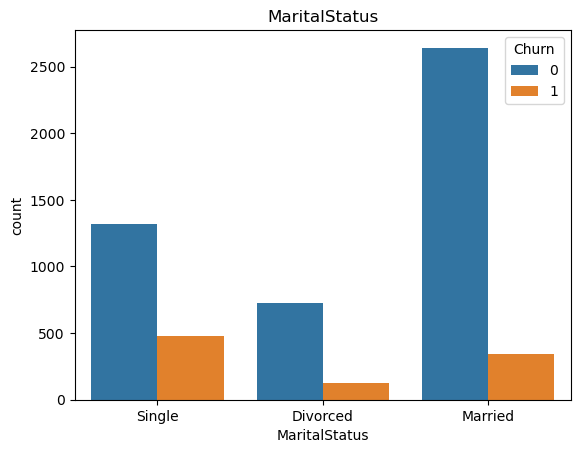

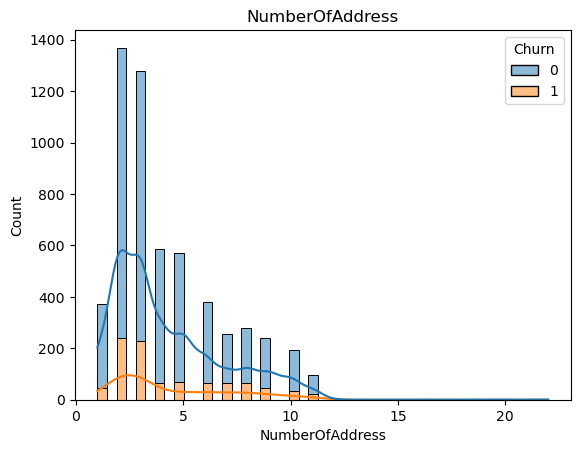

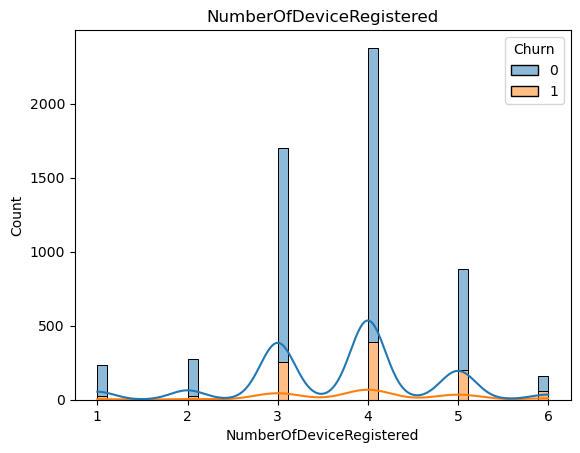

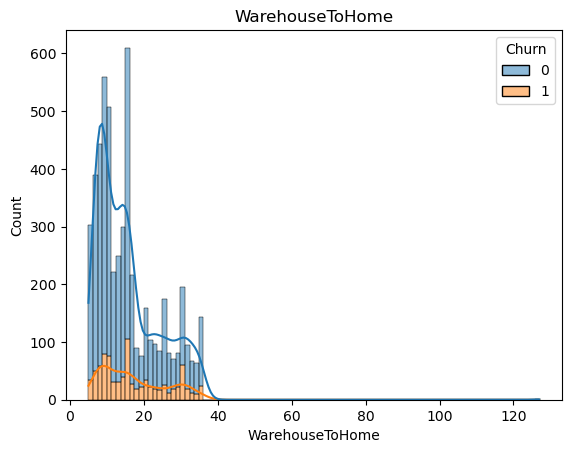

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example loop
cat_cols = df.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    plt.figure(figsize=(8,6))
    plt.title(f"{col} vs Churn", fontsize=14)
    sns.countplot(x=col, data=df, hue="Churn", dodge=True)
    plt.xticks(rotation=45)
    plt.show()

# This code is checking for each feature in the 'custdemo' dataframe and plotting the data based on its datatype
for i in df[custdemo].columns:
  # Checking if the datatype of the feature is 'object'
  if(df[i].dtype == 'object'):    
    # Setting the title of the plot as the name of the feature
    plt.title(i)
    # Plotting a countplot of the feature with the hue being 'Churn'
    sns.countplot(x=i, data=df, hue="Churn", dodge=True)
    # Displaying the plot
    plt.show()
  # If the datatype is not 'object'
  else:
    # Setting the title of the plot as the name of the feature
    plt.title(i)
    # Plotting a histplot of the feature with the hue being 'Churn' and showing a kernel density estimate
    sns.histplot(x=df[i], hue = df['Churn'], data = df, multiple = 'stack', kde=True)
    # Displaying the plot
    plt.show()

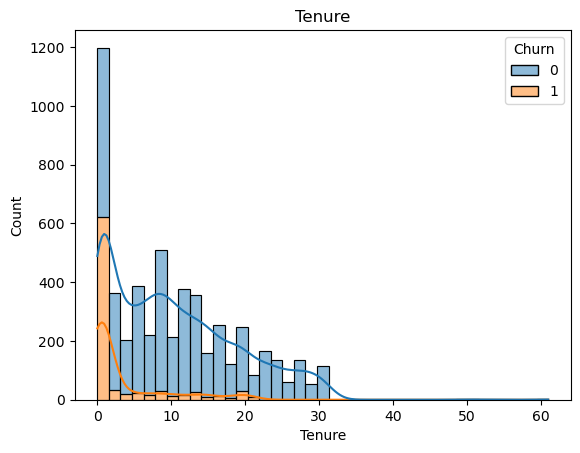

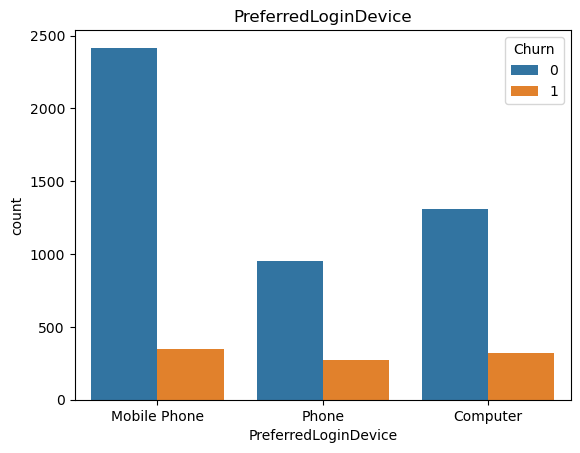

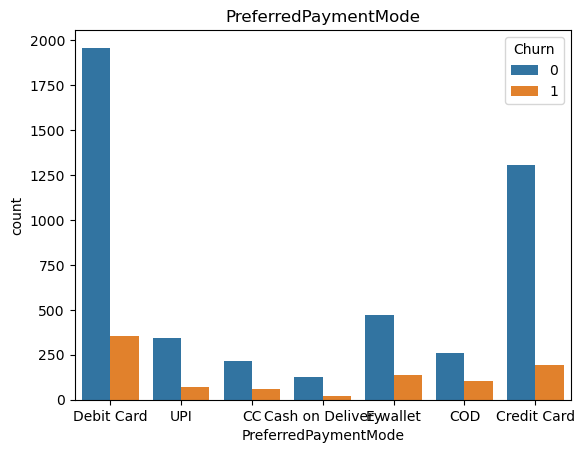

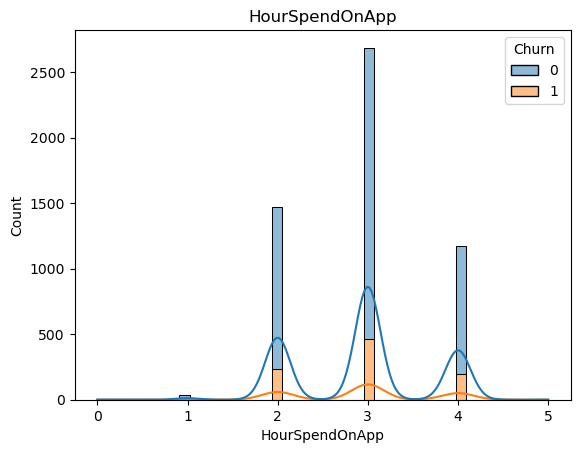

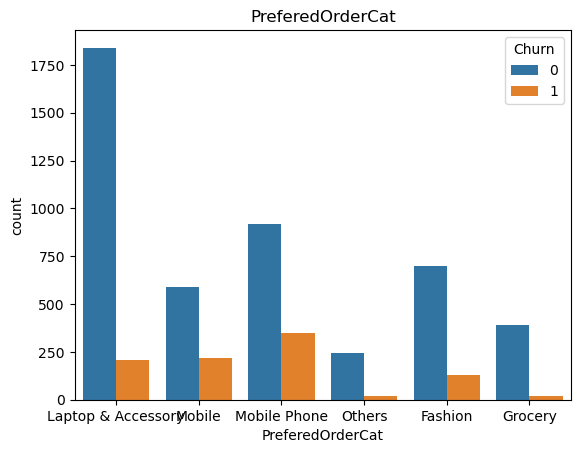

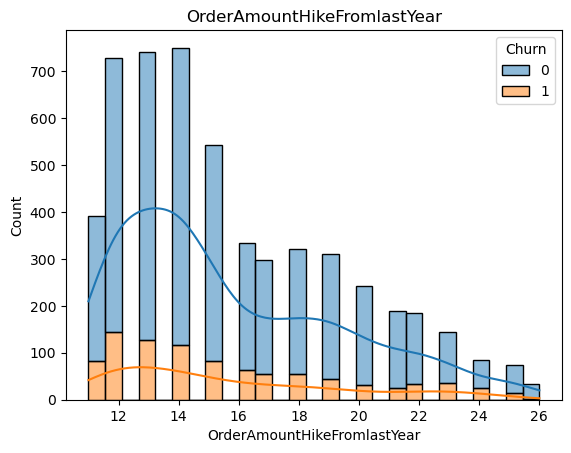

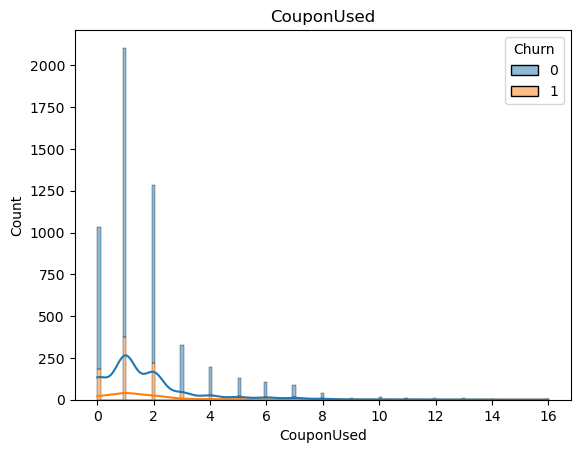

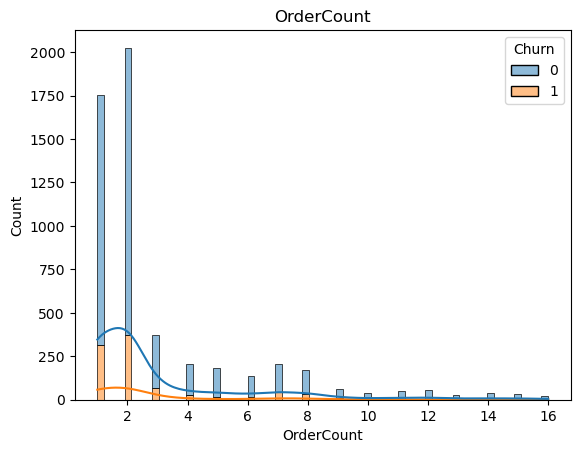

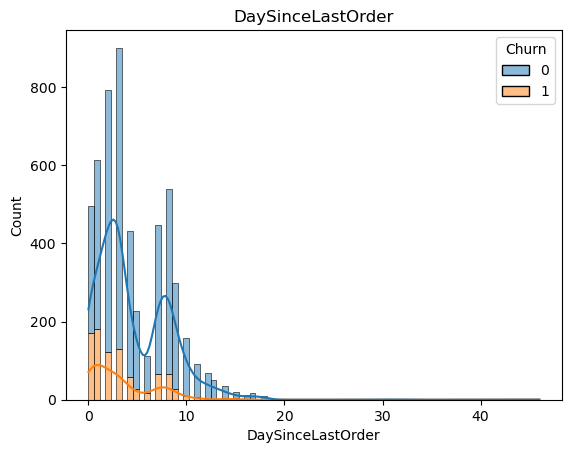

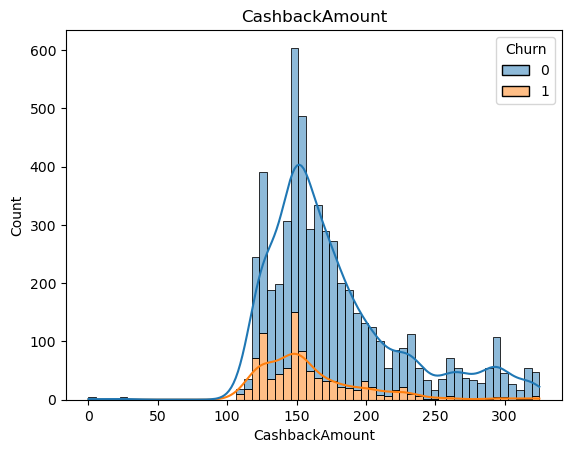

In [21]:
# loop through columns in the customer behavior dataframe
for i in df[custbehv].columns:
  # check if the column data type is object
  if(df[i].dtype == 'object'):
    # set the title of the plot to the column name
    plt.title(i)
    # create a countplot using seaborn library
    sns.countplot(x=i, data=df, hue="Churn")

    # show the plot
    plt.show()
  # if the column data type is not object
  else:
    # set the title of the plot to the column name
    plt.title(i)
    # create a histplot using seaborn library
    sns.histplot(x=df[i], hue = df['Churn'], data = df, multiple = 'stack', kde=True)
    # show the plot
    plt.show()

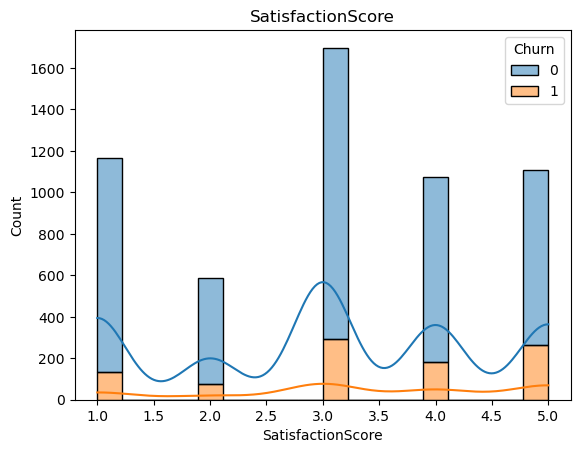

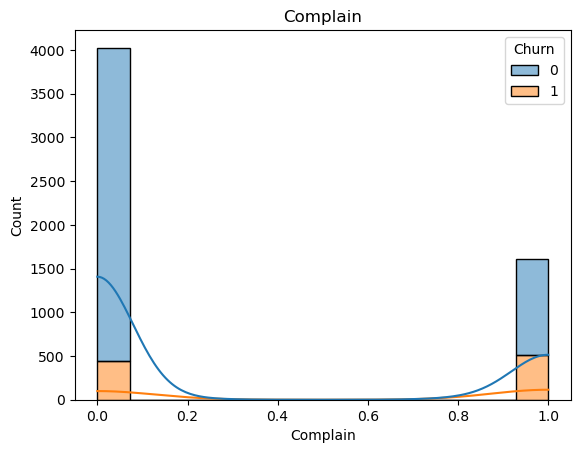

In [22]:
# Plotting features in the "custcompl" dataframe with respect to target variable "Churn"
for i in df[custcompl].columns:
    # If the feature type is "object", use countplot
    if(df[i].dtype == 'object'):
        plt.title(i)
        sns.countplot(df[i], hue = df['Churn'])
        plt.show()
    # If the feature type is not "object", use histplot
    else:
        plt.title(i)
        sns.histplot(x=df[i], hue = df['Churn'], data = df, multiple = 'stack', kde=True)
        plt.show()

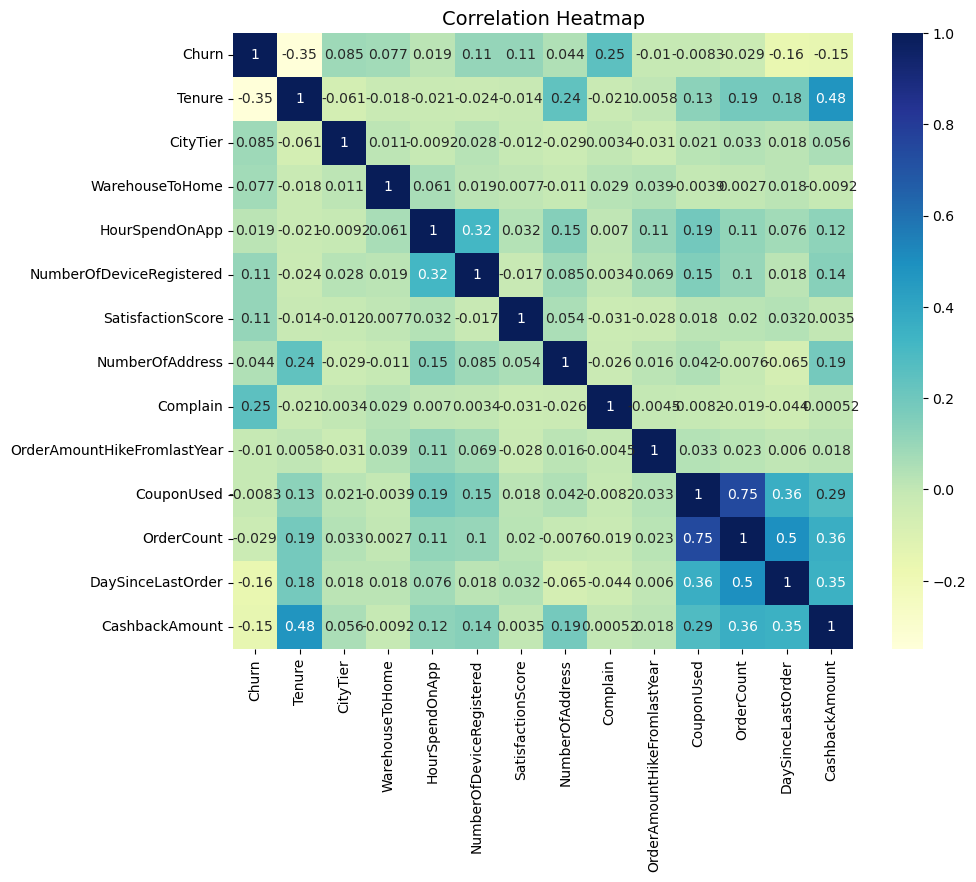

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
corr = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()


In [25]:
df = df.drop(['CouponUsed', 'Tenure'], axis=1)

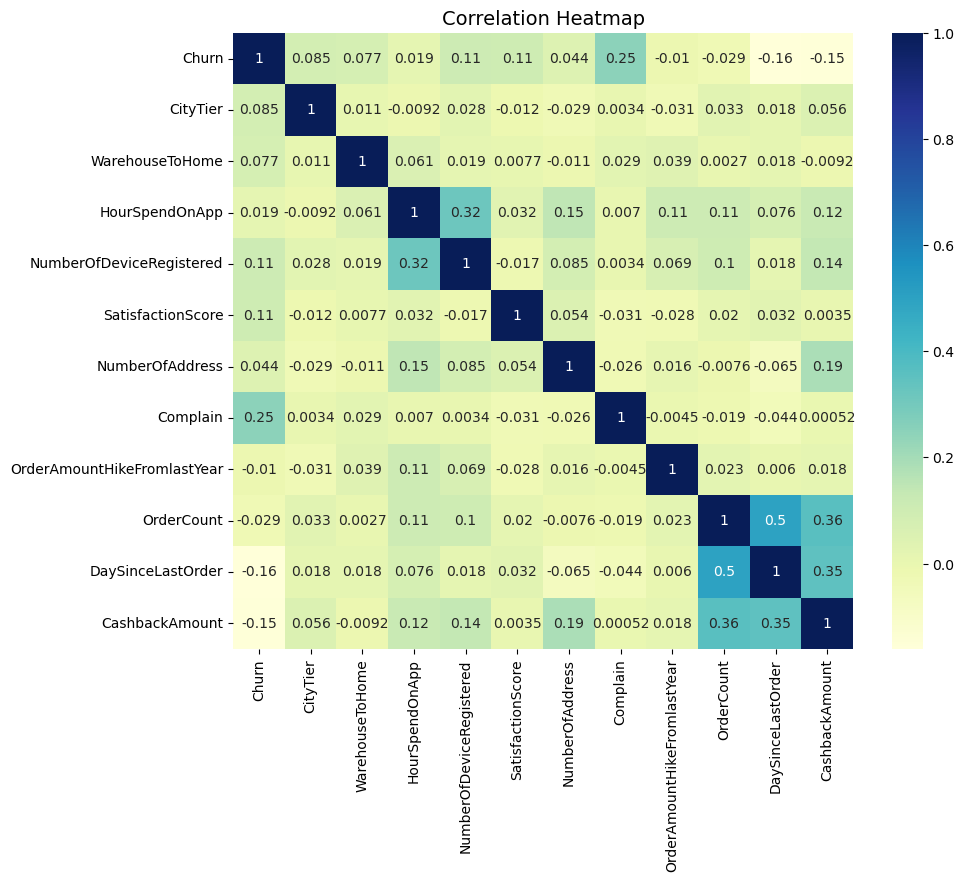

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Keep only numeric columns
corr = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   PreferredLoginDevice         5630 non-null   object 
 2   CityTier                     5630 non-null   int64  
 3   WarehouseToHome              5379 non-null   float64
 4   PreferredPaymentMode         5630 non-null   object 
 5   Gender                       5630 non-null   object 
 6   HourSpendOnApp               5375 non-null   float64
 7   NumberOfDeviceRegistered     5630 non-null   int64  
 8   PreferedOrderCat             5630 non-null   object 
 9   SatisfactionScore            5630 non-null   int64  
 10  MaritalStatus                5630 non-null   object 
 11  NumberOfAddress              5630 non-null   int64  
 12  Complain                     5630 non-null   int64  
 13  OrderAmountHikeFro

In [36]:
import pandas as pd

df2 = pd.read_excel("E Commerce Dataset.xlsx")

q25 = df2['CashbackAmount'].quantile(0.25)
q75 = df2['CashbackAmount'].quantile(0.75)
iqr = q75 - q25

print("Q1 (25th percentile):", q25)
print("Q3 (75th percentile):", q75)
print("IQR:", iqr)

# Calculating the cutoff value using 1.5 times the IQR
cutoff = 1.5 * iqr
# Calculating the lower limit using the 25th percentile value minus the cutoff value
lower = q25 - cutoff
# Calculating the upper limit using the 75th percentile value plus the cutoff value
upper = q75 + cutoff

# Printing the lower and upper limits
print(f'The Lower Limit is : {lower}, The Upper Limit is : {upper}')


Q1 (25th percentile): 145.77
Q3 (75th percentile): 196.3925
IQR: 50.6225
The Lower Limit is : 69.83625, The Upper Limit is : 272.32625


In [37]:
print('The Number of Above Upper Limits :' ,len(df2[df2['CashbackAmount'] > upper]))
print('The Number of Below Lower Limits :' ,len(df2[df2['CashbackAmount'] < lower]))

The Number of Above Upper Limits : 427
The Number of Below Lower Limits : 11


In [38]:
median = np.median(df2['CashbackAmount'])

In [39]:
df2['CashbackAmount'] = np.where(df2['CashbackAmount'] > upper, median, df2['CashbackAmount'])

In [40]:
df = df2.copy()

In [41]:
# Loop over the columns in the DataFrame
for i in df2.columns:
  # Check if there are any missing values in the column
  if (df2[i].isnull().sum() > 0):
    # Calculate the percentage of missing values
    misval = (df2[i].isnull().sum()) / (len(df2[i])) * 100
    # Print the name of the column and the percentage of missing values
    print(f'{i} Perc. Mis Val = {misval:.2f}%. Data Types : {df2[i].dtypes}')

Tenure Perc. Mis Val = 4.69%. Data Types : float64
WarehouseToHome Perc. Mis Val = 4.46%. Data Types : float64
HourSpendOnApp Perc. Mis Val = 4.53%. Data Types : float64
OrderAmountHikeFromlastYear Perc. Mis Val = 4.71%. Data Types : float64
CouponUsed Perc. Mis Val = 4.55%. Data Types : float64
OrderCount Perc. Mis Val = 4.58%. Data Types : float64
DaySinceLastOrder Perc. Mis Val = 5.45%. Data Types : float64


In [42]:
df2.drop(['DaySinceLastOrder'], axis=1, inplace=True)

In [43]:
# initializing empty list to store column names with missing values
misval = []

# looping through each column in dataframe df2
for i in df2.columns:
  # checking if there are any missing values in the column
  if ( df2[i].isnull().sum() != 0 ):
    # if missing values found, appending column name to list
    misval.append(i)

In [44]:
df2.drop(misval, axis=1, inplace=True)

In [45]:
df = df2.copy()

In [46]:
for i in df2.columns:
  if (df2[i].dtypes == 'object'):
    print(f'{i} Number of Unique Values {df2[i].nunique()}  ')

PreferredLoginDevice Number of Unique Values 3  
PreferredPaymentMode Number of Unique Values 7  
Gender Number of Unique Values 2  
PreferedOrderCat Number of Unique Values 6  
MaritalStatus Number of Unique Values 3  


In [47]:
for i in df2.columns:
  if ( (df2[i].dtypes == 'object') & (df2[i].nunique() > 5) ):
    print(f'{i}\n {df[i].value_counts()} ')
    print('\n')

PreferredPaymentMode
 PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64 


PreferedOrderCat
 PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64 




In [48]:
df = df2.copy()

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                5630 non-null   int64  
 1   Churn                     5630 non-null   int64  
 2   PreferredLoginDevice      5630 non-null   object 
 3   CityTier                  5630 non-null   int64  
 4   PreferredPaymentMode      5630 non-null   object 
 5   Gender                    5630 non-null   object 
 6   NumberOfDeviceRegistered  5630 non-null   int64  
 7   PreferedOrderCat          5630 non-null   object 
 8   SatisfactionScore         5630 non-null   int64  
 9   MaritalStatus             5630 non-null   object 
 10  NumberOfAddress           5630 non-null   int64  
 11  Complain                  5630 non-null   int64  
 12  CashbackAmount            5630 non-null   float64
dtypes: float64(1), int64(7), object(5)
memory usage: 571.9+ KB


In [50]:
df['Churn'] = df['Churn'].astype('object')

In [52]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming df is already defined (loaded from CSV/Excel)
colnames = df.columns
num_columns = df.select_dtypes(include=['float', 'int']).columns

scaler = StandardScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])


In [53]:
df_new = pd.DataFrame(data=df, columns=colnames)

In [54]:
df_new.head()

,CustomerID,Churn,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,CashbackAmount
0,-1.731743,1,Mobile Phone,1.469771,Debit Card,Female,-0.67290,Laptop & Accessory,-0.772992,Single,1.852616,1.584290,-0.203103
1,-1.731128,1,Phone,-0.715286,UPI,Male,0.30375,Mobile,-0.048392,Single,1.078430,1.584290,-1.331725
2,-1.730513,1,Phone,-0.715286,Debit Card,Male,0.30375,Mobile,-0.048392,Single,0.691336,1.584290,-1.349653
3,-1.729897,1,Phone,1.469771,Debit Card,Male,0.30375,Laptop & Accessory,1.400807,Single,1.465523,-0.631198,-0.950891
4,-1.729282,1,Phone,-0.715286,CC,Male,-0.67290,Mobile,1.400807,Single,-0.469944,-0.631198,-1.080149


In [55]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                5630 non-null   float64
 1   Churn                     5630 non-null   object 
 2   PreferredLoginDevice      5630 non-null   object 
 3   CityTier                  5630 non-null   float64
 4   PreferredPaymentMode      5630 non-null   object 
 5   Gender                    5630 non-null   object 
 6   NumberOfDeviceRegistered  5630 non-null   float64
 7   PreferedOrderCat          5630 non-null   object 
 8   SatisfactionScore         5630 non-null   float64
 9   MaritalStatus             5630 non-null   object 
 10  NumberOfAddress           5630 non-null   float64
 11  Complain                  5630 non-null   float64
 12  CashbackAmount            5630 non-null   float64
dtypes: float64(7), object(6)
memory usage: 571.9+ KB
